https://www.tensorflow.org/tutorials/keras/basic_classification


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(tr_im,tr_lab),(tt_im,tt_lab) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [5]:
tr_im.shape

(60000, 28, 28)

In [6]:
tr_lab

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

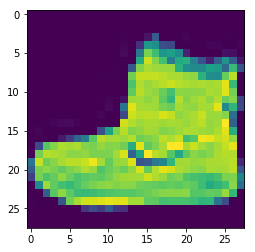

In [7]:
plt.imshow(tr_im[0,:,:])

In [8]:
tr_im.max()

255

In [9]:
tr_im = tr_im / tr_im.max()

In [10]:
tt_im = tt_im / tt_im.max()

In [11]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.Dense(128,activation=tf.nn.relu),
                        keras.layers.Dense(10,activation=tf.nn.softmax)])

In [12]:
model.compile(optimizer=tf.train.AdamOptimizer(),loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [13]:
model.fit(tr_im,tr_lab,epochs=5)

Epoch 1/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.5015 - acc: 0.8242
Epoch 2/5
60000/60000 [==============================] - 2s 35us/step - loss: 0.3763 - acc: 0.8649
Epoch 3/5
60000/60000 [==============================] - 2s 35us/step - loss: 0.3409 - acc: 0.8755
Epoch 4/5
60000/60000 [==============================] - 2s 35us/step - loss: 0.3148 - acc: 0.8840
Epoch 5/5
60000/60000 [==============================] - 2s 35us/step - loss: 0.2983 - acc: 0.8907


In [14]:
tt_loss,tt_acc = model.evaluate(tt_im,tt_lab)
tt_acc

10000/10000 [==============================] - 0s 23us/step


0.8783

In [15]:
predictions = model.predict(tt_im)

In [16]:
p_max = [np.argmax(p) for p in predictions]

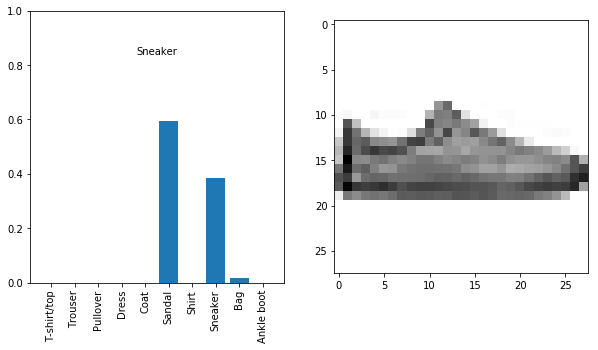

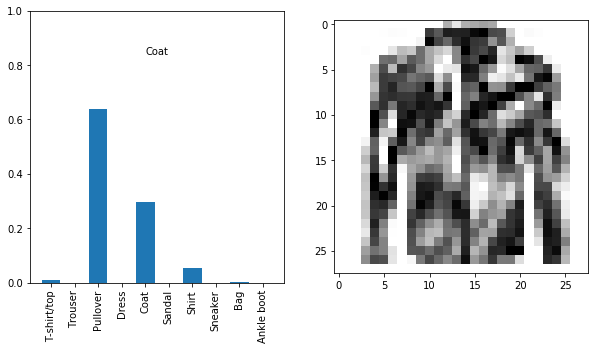

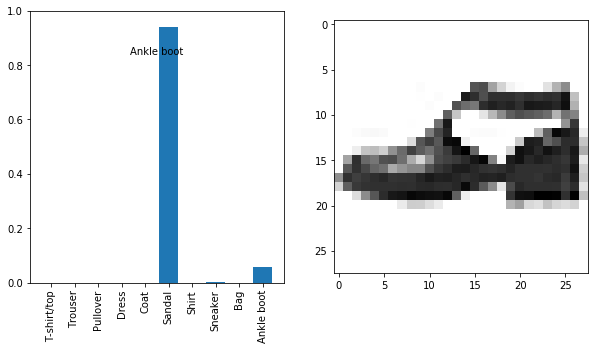

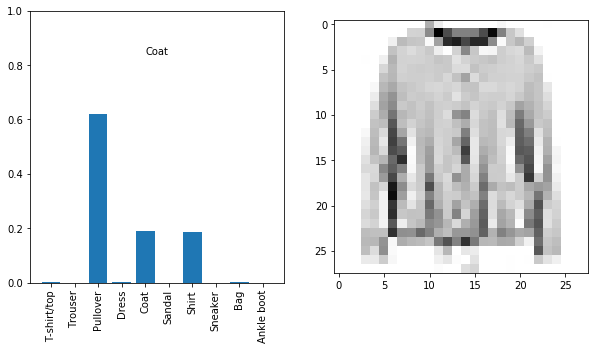

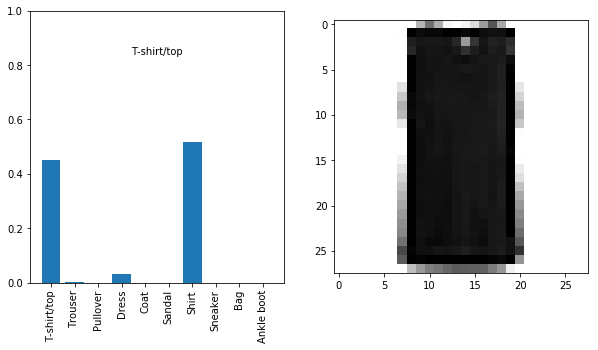

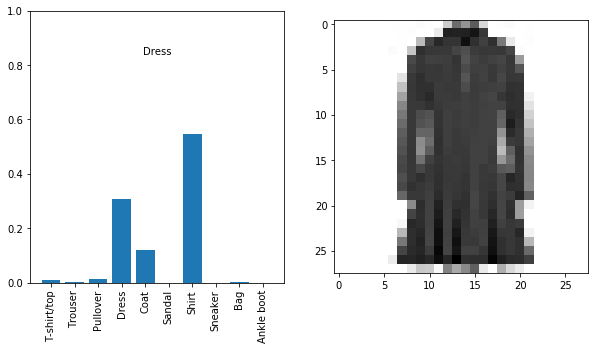

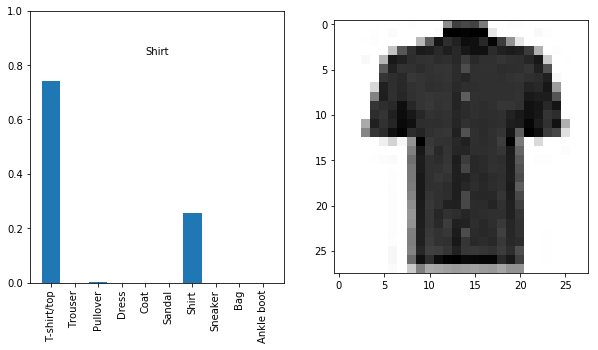

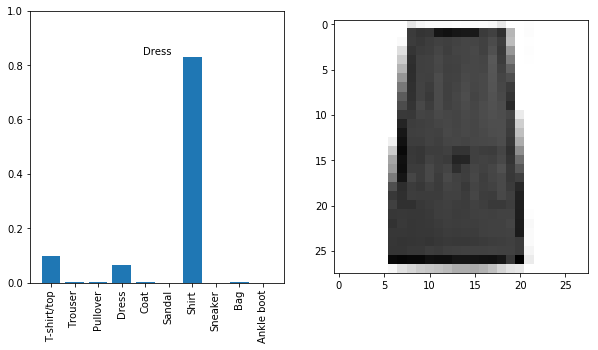

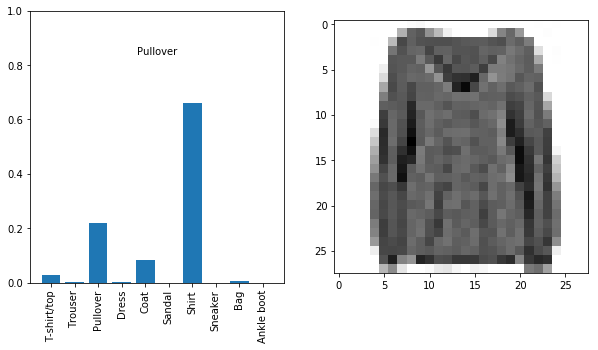

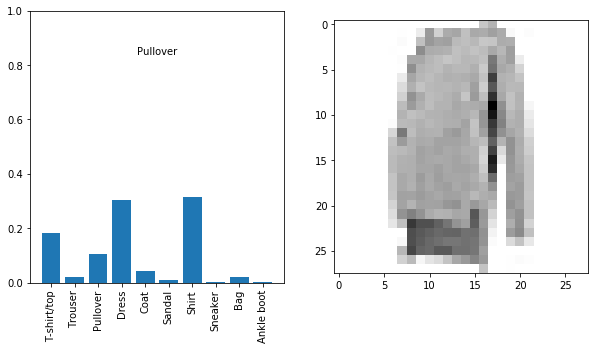

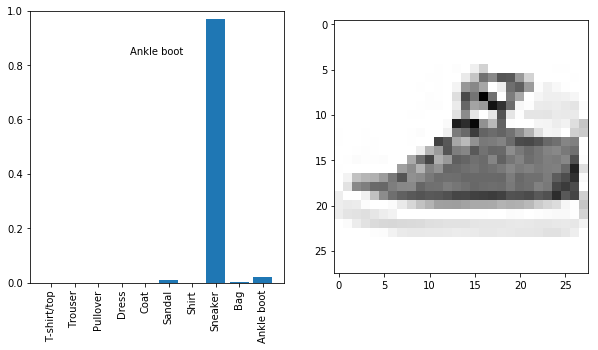

In [17]:
bins = np.arange(len(class_names))
wrong_count = 0
for p,pm,tl,ti in zip(predictions,p_max,tt_lab,tt_im): 
    if pm != tl:
        fig = plt.figure(figsize=(10,5))
        ax1,ax2 = plt.subplot(121),plt.subplot(122)
        ax1.bar(bins,p)
        ax1.set_xticks(bins)
        ax1.set_xticklabels(class_names,rotation=90)
        ax1.set_ylim(0,1)
        ax1.text(0.5,0.85,class_names[tl],transform=ax1.transAxes,ha="center",va="center")
        ax2.imshow(ti,cmap=plt.cm.gray_r)
        plt.show()
        wrong_count += 1
        if wrong_count > 10:
            break